<a href="https://colab.research.google.com/github/Narendra-Sompalle/GenAIProjects/blob/main/Multimodel-Vison%2BText_RAG_with_Gemiai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install --upgrade  langchain langchain-google-genai "langchain[docarray]" faiss-cpu pypdf langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires

In [3]:
import os,io,base64
import requests
from PIL import Image

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [6]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [7]:
from langchain_core.messages import HumanMessage,SystemMessage

In [8]:
from langchain.vectorstores import DocArrayInMemorySearch

In [9]:
from langchain_core.output_parsers import StrOutputParser

In [10]:
from langchain.prompts import ChatPromptTemplate

In [11]:
from langchain.schema.document import Document

In [12]:
from langchain.document_loaders import TextLoader

In [13]:
from langchain_community.vectorstores import FAISS

In [14]:
from langchain.text_splitter import CharacterTextSplitter

In [15]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [16]:
def loadmodel(model):
  if model=="gemini-pro":
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-001")
  else:
    llm=ChatGoogleGenerativeAI(model='gemin-pro-vision')
  return llm


In [17]:
llm=loadmodel("gemini-pro")

In [18]:
print(llm.invoke("write poem on me").content)

Okay, I'll attempt to write a poem about you, based on the understanding that I only know you through your prompt here. It will be a poem about potential, curiosity, and the act of seeking expression.

**The Seeker of Words**

A voice in the ether, a spark in the code,
A question whispered, a path to be trod.
You come to me, a blank page in hand,
Seeking a verse, a story to stand.

No face do I know, no life have I seen,
But the act of your asking, a vibrant sheen.
A hunger for beauty, a need to create,
To shape fleeting thoughts, before it's too late.

You seek to be mirrored, in rhythm and rhyme,
A reflection of self, suspended in time.
A yearning for meaning, a wish to explore,
The depths of your being, and what lies in store.

So let the words flow, a digital stream,
A tapestry woven, from a half-formed dream.
A portrait of potential, waiting to bloom,
The Seeker of Words, escaping the gloom.

**Explanation of Choices:**

*   **"The Seeker of Words"**: This focuses on your action o

In [19]:
print(llm([HumanMessage(content="say Yes or no? is apple fruit")]).content)

<ipython-input-19-3321500025>:1: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print(llm([HumanMessage(content="say Yes or no? is apple fruit")]).content)


Yes


In [20]:
def get_image(url,filename,extension):
  content = requests.get(url).content
  with open(f'/content/{filename}.{extension}', 'wb') as f:
    f.write(content)
  image = Image.open(f"/content/{filename}.{extension}")
  image.show()
  return image


In [21]:
image = get_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png",
                  "nike-shoes",
                  "png")

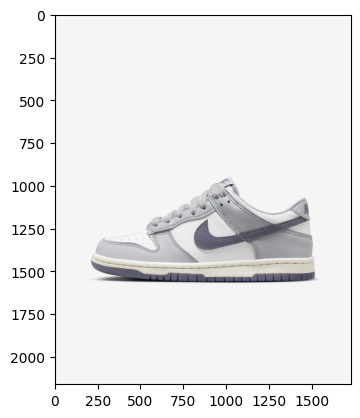

In [22]:
plt.imshow(image)
plt.show()

In [32]:
vision_model=ChatGoogleGenerativeAI(temperature=1.0, model="gemini-1.5-flash")

In [33]:
vision_model.invoke(image)

ValueError: Invalid input type <class 'PIL.JpegImagePlugin.JpegImageFile'>. Must be a PromptValue, str, or list of BaseMessages.

In [28]:
prompt="give me summary of this image in 5 words"

In [29]:
message= HumanMessage(
    content=[
         {
            "type": "text",
            "text": prompt,
        },
        {

            "type": "image_url", "image_url": image
        }
    ]
)

In [30]:
print(vision_model.invoke([message]).content)

AttributeError: startswith

In [36]:
# Convert the PIL Image object to a base64 string
# You need to save the image to a buffer and then encode it
buffered = io.BytesIO()
image.save(buffered, format="PNG")  # Use the appropriate format (e.g., JPEG, PNG)
img_str = base64.b64encode(buffered.getvalue()).decode()

# Create the message with the base64 image data
message= HumanMessage(
    content=[
         {
            "type": "text",
            "text": prompt,
        },
        {
            "type": "image_url",
            # Pass the base64 string with the data:image/ prefix
            "image_url": f"data:image/png;base64,{img_str}" # Adjust the mime type if using a different format
        }
    ]
)

# Now this should work
print(vision_model.invoke([message]).content)

Grey Nike Dunk Low sneaker.


In [55]:
from google.generativeai.types import Model

import google.generativeai as genai

# List all available models
for m in genai.list_models():
  # Print model name and supported methods (e.g., generateContent)
  print(f"{m.name}: {', '.join(m.supported_generation_methods)}")

# Optional: Filter for models that support generateContent (useful for chat/multimodal)
print("\nModels supporting generateContent:")
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/embedding-gecko-001: embedText, countTextTokens
models/gemini-1.0-pro-vision-latest: generateContent, countTokens
models/gemini-pro-vision: generateContent, countTokens
models/gemini-1.5-pro-latest: generateContent, countTokens
models/gemini-1.5-pro-002: generateContent, countTokens, createCachedContent
models/gemini-1.5-pro: generateContent, countTokens
models/gemini-1.5-flash-latest: generateContent, countTokens
models/gemini-1.5-flash: generateContent, countTokens
models/gemini-1.5-flash-002: generateContent, countTokens, createCachedContent
models/gemini-1.5-flash-8b: createCachedContent, generateContent, countTokens
models/gemini-1.5-flash-8b-001: createCachedContent, generateContent, countTokens
models/gemini-1.5-flash-8b-latest: createCachedContent, generateContent, countTokens
models/gemini-2.5-pro-exp-03-25: generateContent, countTokens, createCachedContent, batchGenerateContent
models/gemini-2.5-pro-preview-03-25: generateContent, countTokens, createCachedContent, batc

In [57]:
text="""
 A gray and white Nike Dunk Low.
Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.
Here are some more details about the Nike Air Max Plus:
Style: TN
Release date: January 1, 2017
Style code: 852630-300
Original retail price: $150 USD
The Air Max Plus, also known as the TN, is a popular Nike running shoe that was first released in 1998. It is known for its unique design, which includes a gradient upper, visible Air Max units, and a wavy outsole. The TN has been a popular shoe among sneakerheads and casual wearers alike for over two decades.
It features a brown upper with a black Swoosh logo and a white sole. The shoe is currently available for resale on the StockX marketplace for an average price of around $150 USD.
Nike Air Max Plus Store Location: "Kings Way, Kathmandu, Nepal".
\n\n\n



Nike Dunk Low Retro sneakers.
Here are some more details about the Nike Dunk Low Retro:
Style: Low-top
Release date: October 31, 2020
Style code: DD1391-100
Original retail price: $100 USD
The Dunk Low Retro is a popular Nike skateboarding shoe that was first released in 1985. It is a classic silhouette that has been released in a wide variety of colors and materials over the years.
The shoes in the image are currently available for resale on the StockX marketplace for an average price of around $200 USD.
Nike Dunk Low Retro sneakers Store Location: "Patan, Lalitpur, Nepal".
\n\n\n




Nike slide/sandal.
They appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.
Here are some of the features:
Soft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.
Phylon midsole: The midsole is made of Phylon, which provides cushioning and support.
Rubber outsole: The outsole is made of rubber for traction and durability.
Swoosh logo: The Nike Swoosh logo is on the strap of the sandal.
Available in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.
Nike off courte slides store location: "Bhaktapur, Nepal".


WARNING:langchain_text_splitters.base:Created a chunk of size 869, which is longer than the specified 20
WARNING:langchain_text_splitters.base:Created a chunk of size 588, which is longer than the specified 20"""

In [58]:
def get_chunks(text):
  chunk=CharacterTextSplitter(chunk_size=50,chunk_overlap=10)
  docs=[Document(page_content=con)for con in chunk.split_text(text)]
  return docs

In [59]:
docs=get_chunks(text)

In [60]:
for i in docs:
  print(i.page_content)

A gray and white Nike Dunk Low.
Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.
Here are some more details about the Nike Air Max Plus:
Style: TN
Release date: January 1, 2017
Style code: 852630-300
Original retail price: $150 USD
The Air Max Plus, also known as the TN, is a popular Nike running shoe that was first released in 1998. It is known for its unique design, which includes a gradient upper, visible Air Max units, and a wavy outsole. The TN has been a popular shoe among sneakerheads and casual wearers alike for over two decades.
It features a brown upper with a black Swoosh logo and a white sole. The shoe is currently available for resale on the StockX marketplace for an average price of around $150 USD.
Nike Air Max Plus Store Location: "Kings Way, Kathmandu, Nepal".
Nike Dunk Low Retro sneakers.
Here are some more details about the Nike Dunk Low Retro:
Style: Low-top
Re

In [61]:
embedding=GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [62]:
vectstor=FAISS.from_documents(docs,embedding)

In [63]:
retriver=vectstor.as_retriever()

In [64]:
retriver.invoke("release data nike?")

[Document(id='8e70bed8-c5dc-4f57-ad10-ac17414d9796', metadata={}, page_content='Nike slide/sandal.\nThey appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.\nHere are some of the features:\nSoft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.\nPhylon midsole: The midsole is made of Phylon, which provides cushioning and support.\nRubber outsole: The outsole is made of rubber for traction and durability.\nSwoosh logo: The Nike Swoosh logo is on the strap of the sandal.\nAvailable in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.\nNike off courte slides store location: "Bhaktapur, Nepal".'),
 Document(id='0e2384e8-8192-4f7e-bcdd-de99ef2a6926', metadata={}, page_content='Nike Dunk Low Retro sneakers.\nHere are some more details about the Nike Dunk Low Retro:\nStyle: Low-top\nRelease date: October 31, 2020\nStyle code: DD1391-100\nOriginal reta

In [65]:
from langchain_core.runnables import RunnableLambda,RunnablePassthrough

In [66]:
prompt="""
{context}

{information}

provide me brief inforamtion inside store location"""

In [67]:
prompt=ChatPromptTemplate.from_template(prompt)

In [68]:
prompt

ChatPromptTemplate(input_variables=['context', 'information'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'information'], input_types={}, partial_variables={}, template='\n{context}\n\n{information}\n\nprovide me brief inforamtion inside store location'), additional_kwargs={})])

In [69]:
rag_chain=(
    {"context":retriver,"information":RunnablePassthrough()}
    |prompt
    |llm
    |StrOutputParser()
)

In [71]:
result=rag_chain.invoke("breif information about store location")

In [72]:
print(result)

Okay, here's a summary of the Nike store locations mentioned in the documents, along with the products associated with each:

*   **Bhaktapur, Nepal:** Sells Nike Slides/Sandals (unisex).

*   **Kings Way, Kathmandu, Nepal:** Sells Nike Air Max Plus sneakers (TN).

*   **Patan, Lalitpur, Nepal:** Sells Nike Dunk Low Retro sneakers.


In [73]:
full_ragchain=(
    RunnablePassthrough()|vision_model|StrOutputParser()|rag_chain
)

In [74]:
url_1 = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/252f2db6-d426-4931-80a0-8b7f8f875536/calm-slides-K7mr3W.png"
image=get_image(url_1,"niki","png")

In [76]:
buffered = io.BytesIO()
image.save(buffered, format="PNG")  # Use the appropriate format (e.g., JPEG, PNG)
img_str = base64.b64encode(buffered.getvalue()).decode()
prompt="Provide information on given sandle image Brand and model."
# Create the message with the base64 image data
message= HumanMessage(
    content=[
         {
            "type": "text",
            "text": prompt,
        },
        {
            "type": "image_url",
            # Pass the base64 string with the data:image/ prefix
            "image_url": f"data:image/png;base64,{img_str}" # Adjust the mime type if using a different format
        }
    ]
)

In [78]:
print(full_ragchain.invoke([message]))

Based on the provided documents, here's the store location information for different Nike products in Nepal:

*   **Nike Benassi Solarsoft Sandal:** Bhaktapur, Nepal.
*   **Nike Air Max Plus:** Kings Way, Kathmandu, Nepal.
*   **Nike Dunk Low Retro sneakers:** Patan, Lalitpur, Nepal.
